In [77]:
import numpy as np
import pandas as pd
import yfinance as yf
import arch

# Download data for S&P 500 index
DOW = yf.download('^DJI', start='2002-01-01', end='2022-01-01')
NASDAQ = yf.download('^IXIC', start='2002-01-01', end='2022-01-01')
FTSE = yf.download('^FTSE', start='2002-01-01', end='2022-01-01')
NIKKEI = yf.download('^N225', start='2002-01-01', end='2022-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


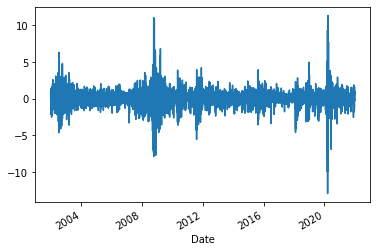

In [78]:
data = DOW  # data from the library 

market = data["Close"]

returns = 100 * market.pct_change().dropna() # generating return series
ax = returns.plot() # ploting the data

In [79]:
returns.describe()

count    5035.000000
mean        0.032409
std         1.176076
min       -12.926546
25%        -0.424294
50%         0.054795
75%         0.545588
max        11.365041
Name: Close, dtype: float64

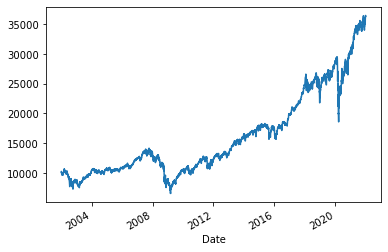

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

data['Adj Close'].plot()
plt.show()

In [81]:
from arch import arch_model

modeldow = arch_model(returns, p=1,o=0,q=0)
outdow=modeldow.fit()
print(outdow.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 34022.479903563355
Iteration:      2,   Func. Count:     14,   Neg. LLF: 12013.429067517744
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8007.655420483344
Iteration:      4,   Func. Count:     27,   Neg. LLF: 7386.609521492061
Iteration:      5,   Func. Count:     31,   Neg. LLF: 7400.304394595706
Iteration:      6,   Func. Count:     36,   Neg. LLF: 7385.110445567877
Iteration:      7,   Func. Count:     40,   Neg. LLF: 7385.104560707854
Iteration:      8,   Func. Count:     44,   Neg. LLF: 7385.104518080803
Iteration:      9,   Func. Count:     47,   Neg. LLF: 7385.104518080765
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7385.104518080803
            Iterations: 9
            Function evaluations: 47
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:              

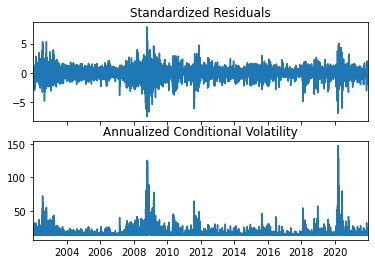

In [82]:
figdow = outdow.plot(annualize="D") #generating volatility graphs

In [40]:
model2dow = arch_model(returns, p=1,o=0,q=1)
out2dow=model2dow.fit()
print(out2dow.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 325052070917141.6
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2803034245.749263
Iteration:      3,   Func. Count:     22,   Neg. LLF: 9169.360965425773
Iteration:      4,   Func. Count:     29,   Neg. LLF: 6657.685241738967
Iteration:      5,   Func. Count:     35,   Neg. LLF: 6541.408118992457
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6668.76583168005
Iteration:      7,   Func. Count:     47,   Neg. LLF: 6522.802700430255
Iteration:      8,   Func. Count:     52,   Neg. LLF: 6522.798598446069
Iteration:      9,   Func. Count:     57,   Neg. LLF: 6522.798540031579
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6522.798400099712
Iteration:     11,   Func. Count:     67,   Neg. LLF: 6522.798400098422
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6522.798400099712
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11


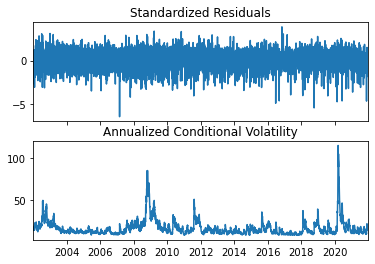

In [41]:
fig2dow = out2dow.plot(annualize="D") #generating volatility graphs

In [42]:
# Estimating TGARCH

model3dow= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3dow= model3dow.fit()
print(out3dow.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 43869.12009353605
Iteration:      2,   Func. Count:     21,   Neg. LLF: 301833.4017542469
Iteration:      3,   Func. Count:     31,   Neg. LLF: 52331.25937615673
Iteration:      4,   Func. Count:     39,   Neg. LLF: 6417.052214161056
Iteration:      5,   Func. Count:     45,   Neg. LLF: 27634.592471518263
Iteration:      6,   Func. Count:     54,   Neg. LLF: 6778.9458325240075
Iteration:      7,   Func. Count:     62,   Neg. LLF: 6430.873820509889
Iteration:      8,   Func. Count:     69,   Neg. LLF: 11213.489992729592
Iteration:      9,   Func. Count:     78,   Neg. LLF: 6406.4592481163045
Iteration:     10,   Func. Count:     84,   Neg. LLF: 6404.991265068471
Iteration:     11,   Func. Count:     90,   Neg. LLF: 6404.791160077158
Iteration:     12,   Func. Count:     96,   Neg. LLF: 6404.775420896631
Iteration:     13,   Func. Count:    102,   Neg. LLF: 6404.769345510136
Iteration:     14,   Func. Count:    108,   Neg. LLF: 6404.7

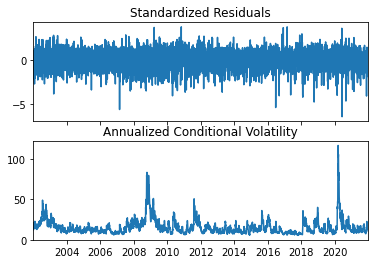

In [43]:
fig3dow = out3dow.plot(annualize="D") #generating volatility graphs

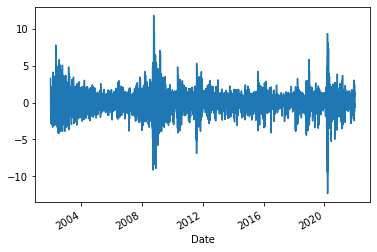

In [44]:
data = NASDAQ  # data from the library 

market = data["Close"]

returns = 100 * market.pct_change().dropna() # generating return series
ax = returns.plot() # ploting the data

In [45]:
returns.describe()

count    5035.000000
mean        0.050636
std         1.382202
min       -12.321331
25%        -0.544207
50%         0.103487
75%         0.727317
max        11.805930
Name: Close, dtype: float64

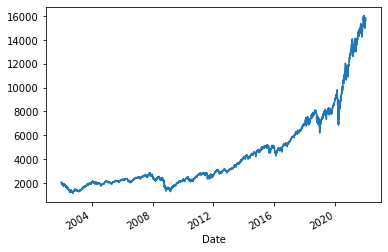

In [46]:
data['Adj Close'].plot()
plt.show()

In [47]:
model1nasdaq = arch_model(returns, p=1,o=0,q=0)
out1nasdaq=model1nasdaq.fit()
print(out1nasdaq.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 31888.671334263345
Iteration:      2,   Func. Count:     13,   Neg. LLF: 13516.729341252605
Iteration:      3,   Func. Count:     21,   Neg. LLF: 8734.632198684893
Iteration:      4,   Func. Count:     26,   Neg. LLF: 8728.184505379892
Iteration:      5,   Func. Count:     31,   Neg. LLF: 8488.486660774068
Iteration:      6,   Func. Count:     35,   Neg. LLF: 8488.438250672247
Iteration:      7,   Func. Count:     39,   Neg. LLF: 8488.434834183981
Iteration:      8,   Func. Count:     43,   Neg. LLF: 8488.434772433746
Iteration:      9,   Func. Count:     46,   Neg. LLF: 8488.43477243437
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8488.434772433746
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:               

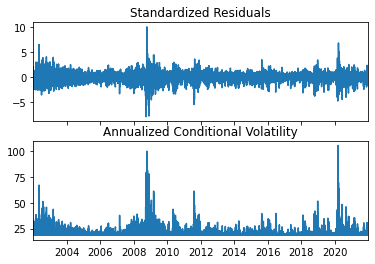

In [48]:
fig1nasdaq = out1nasdaq.plot(annualize="D") #generating volatility graphs

In [49]:
model2nasdaq = arch_model(returns, p=1,o=0,q=1)
out2nasdaq=model2nasdaq.fit()
print(out2nasdaq.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 16633599003.514278
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2761695572.2838817
Iteration:      3,   Func. Count:     22,   Neg. LLF: 11113.678548311349
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7791.18301094579
Iteration:      5,   Func. Count:     35,   Neg. LLF: 15075.081669655276
Iteration:      6,   Func. Count:     41,   Neg. LLF: 7768.193679546319
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7748.265526509821
Iteration:      8,   Func. Count:     53,   Neg. LLF: 7748.043981000206
Iteration:      9,   Func. Count:     58,   Neg. LLF: 7748.043133497063
Iteration:     10,   Func. Count:     63,   Neg. LLF: 7748.043128856768
Iteration:     11,   Func. Count:     67,   Neg. LLF: 7748.043128856665
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7748.043128856768
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations:

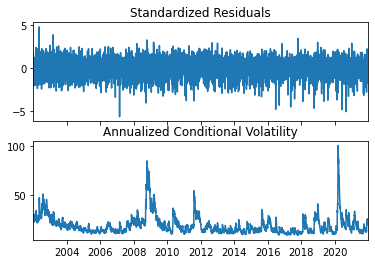

In [50]:
fig2nasdaq = out2nasdaq.plot(annualize="D") #generating volatility graphs

In [51]:
model3nasdaq= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3nasdaq= model3nasdaq.fit()
print(out3nasdaq.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 45086.61908270263
Iteration:      2,   Func. Count:     21,   Neg. LLF: 39158.75797541762
Iteration:      3,   Func. Count:     32,   Neg. LLF: 55842.73305479999
Iteration:      4,   Func. Count:     40,   Neg. LLF: 7682.07939882785
Iteration:      5,   Func. Count:     47,   Neg. LLF: 34196.27737947897
Iteration:      6,   Func. Count:     55,   Neg. LLF: 7667.037659739948
Iteration:      7,   Func. Count:     62,   Neg. LLF: 7729.259412855214
Iteration:      8,   Func. Count:     69,   Neg. LLF: 7661.54121128384
Iteration:      9,   Func. Count:     76,   Neg. LLF: 7678.691484413354
Iteration:     10,   Func. Count:     83,   Neg. LLF: 7658.226429267844
Iteration:     11,   Func. Count:     89,   Neg. LLF: 7658.21856498914
Iteration:     12,   Func. Count:     95,   Neg. LLF: 7658.2185118129955
Iteration:     13,   Func. Count:    101,   Neg. LLF: 7658.218522463171
Iteration:     14,   Func. Count:    108,   Neg. LLF: 7658.2184912

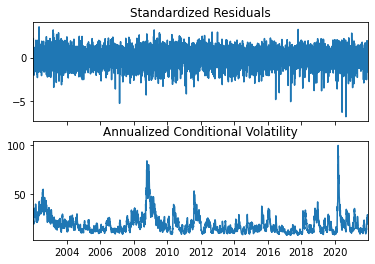

In [52]:
fig3nasdaq = out3nasdaq.plot(annualize="D") #generating volatility graphs

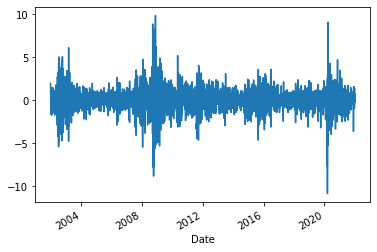

In [53]:
data = FTSE  # data from the library 

market = data["Close"]

returns = 100 * market.pct_change().dropna() # generating return series
ax = returns.plot() # ploting the data

In [54]:
returns.describe()

count    5053.000000
mean        0.013760
std         1.172811
min       -10.873819
25%        -0.507925
50%         0.048339
75%         0.575930
max         9.838667
Name: Close, dtype: float64

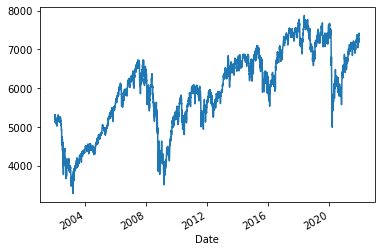

In [55]:
data['Adj Close'].plot()
plt.show()

In [56]:
model1FTSE = arch_model(returns, p=1,o=0,q=0)
out1FTSE=model1FTSE.fit()
print(out1FTSE.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 30401.313645674156
Iteration:      2,   Func. Count:     13,   Neg. LLF: 12666.049658715521
Iteration:      3,   Func. Count:     21,   Neg. LLF: 7974.17170615314
Iteration:      4,   Func. Count:     26,   Neg. LLF: 7586.309018127408
Iteration:      5,   Func. Count:     31,   Neg. LLF: 7578.131344231122
Iteration:      6,   Func. Count:     35,   Neg. LLF: 7578.099988925614
Iteration:      7,   Func. Count:     39,   Neg. LLF: 7578.099614559769
Iteration:      8,   Func. Count:     42,   Neg. LLF: 7578.099614559673
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7578.099614559769
            Iterations: 8
            Function evaluations: 42
            Gradient evaluations: 8
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:   

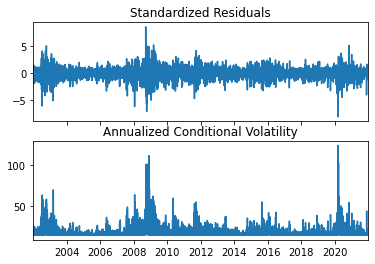

In [57]:
fig1FTSE = out1FTSE.plot(annualize="D") #generating volatility graphs

In [58]:
model2FTSE = arch_model(returns, p=1,o=0,q=1)
out2FTSE=model2FTSE.fit()
print(out2FTSE.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2933973095.6677656
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2763184654.283522
Iteration:      3,   Func. Count:     22,   Neg. LLF: 9335.089307434246
Iteration:      4,   Func. Count:     29,   Neg. LLF: 6916.352764654361
Iteration:      5,   Func. Count:     35,   Neg. LLF: 6861.264032261148
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6915.405263354956
Iteration:      7,   Func. Count:     47,   Neg. LLF: 6849.1046929530075
Iteration:      8,   Func. Count:     52,   Neg. LLF: 6849.065825751818
Iteration:      9,   Func. Count:     57,   Neg. LLF: 6849.063451739676
Iteration:     10,   Func. Count:     62,   Neg. LLF: 6849.062664692523
Iteration:     11,   Func. Count:     67,   Neg. LLF: 6849.062555533492
Iteration:     12,   Func. Count:     72,   Neg. LLF: 6849.0625537940805
Iteration:     13,   Func. Count:     76,   Neg. LLF: 6849.0625537930755
Optimization terminated successfully    (Exit mode 0)
      

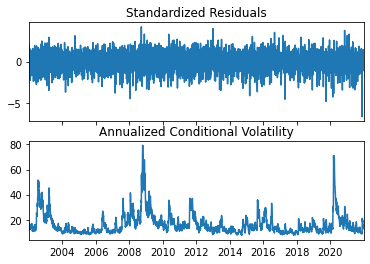

In [59]:
fig2FTSE = out2FTSE.plot(annualize="D") #generating volatility graphs

In [60]:
model3FTSE= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3FTSE= model3FTSE.fit()
print(out3FTSE.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 46822.646906372276
Iteration:      2,   Func. Count:     21,   Neg. LLF: 286738.38207210164
Iteration:      3,   Func. Count:     31,   Neg. LLF: 54942.87347320131
Iteration:      4,   Func. Count:     39,   Neg. LLF: 6729.000699646315
Iteration:      5,   Func. Count:     45,   Neg. LLF: 12880.352102541345
Iteration:      6,   Func. Count:     54,   Neg. LLF: 8322.992995898287
Iteration:      7,   Func. Count:     61,   Neg. LLF: 6763.4574204809805
Iteration:      8,   Func. Count:     68,   Neg. LLF: 6740.189136787709
Iteration:      9,   Func. Count:     75,   Neg. LLF: 6724.47134153644
Iteration:     10,   Func. Count:     82,   Neg. LLF: 6721.3623617843095
Iteration:     11,   Func. Count:     88,   Neg. LLF: 6721.338973294796
Iteration:     12,   Func. Count:     94,   Neg. LLF: 6721.318341580214
Iteration:     13,   Func. Count:    100,   Neg. LLF: 6721.314529364763
Iteration:     14,   Func. Count:    106,   Neg. LLF: 6721.3

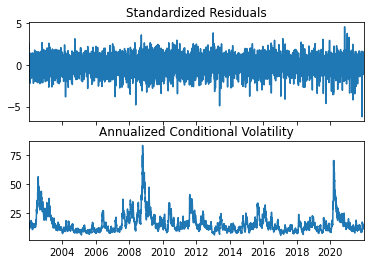

In [61]:
fig3FTSE = out3FTSE.plot(annualize="D") #generating volatility graphs

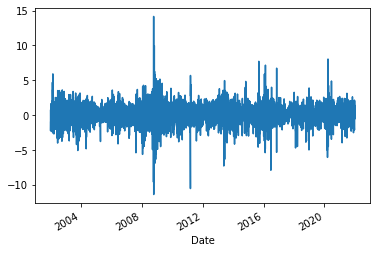

In [62]:
data = NIKKEI  # data from the library 

market = data["Close"]

returns = 100 * market.pct_change().dropna() # generating return series
ax = returns.plot() # ploting the data

In [63]:
returns.describe()

count    4896.000000
mean        0.030493
std         1.453954
min       -11.406368
25%        -0.665159
50%         0.057401
75%         0.798240
max        14.150312
Name: Close, dtype: float64

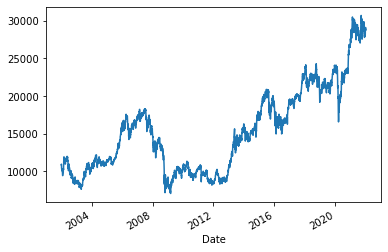

In [64]:
data['Adj Close'].plot()
plt.show()

In [65]:
model1NIKK = arch_model(returns, p=1,o=0,q=0)
out1NIKK=model1NIKK.fit()
print(out1NIKK.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 20804.298455877222
Iteration:      2,   Func. Count:     12,   Neg. LLF: 20042.16685900583
Iteration:      3,   Func. Count:     19,   Neg. LLF: 8762.099544164732
Iteration:      4,   Func. Count:     24,   Neg. LLF: 3225208105.364993
Iteration:      5,   Func. Count:     29,   Neg. LLF: 8529.517836218041
Iteration:      6,   Func. Count:     33,   Neg. LLF: 8529.093662225765
Iteration:      7,   Func. Count:     37,   Neg. LLF: 8529.07304408131
Iteration:      8,   Func. Count:     41,   Neg. LLF: 8529.07270322808
Iteration:      9,   Func. Count:     45,   Neg. LLF: 8529.072666322443
Iteration:     10,   Func. Count:     48,   Neg. LLF: 8529.072666322434
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8529.072666322443
            Iterations: 10
            Function evaluations: 48
            Gradient evaluations: 10
                      Constant Mean - ARCH Model Results                

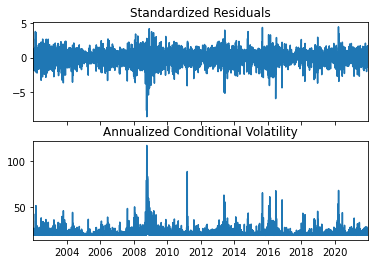

In [66]:
fig1NIKK = out1NIKK.plot(annualize="D") #generating volatility graphs

In [67]:
model2NIKK = arch_model(returns, p=1,o=0,q=1)
out2NIKK=model2NIKK.fit()
print(out2NIKK.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 35950.56728487063
Iteration:      2,   Func. Count:     15,   Neg. LLF: 5558407.964148251
Iteration:      3,   Func. Count:     22,   Neg. LLF: 9121.128422209036
Iteration:      4,   Func. Count:     30,   Neg. LLF: 8789.15986894927
Iteration:      5,   Func. Count:     38,   Neg. LLF: 8280.822440283071
Iteration:      6,   Func. Count:     45,   Neg. LLF: 8107.293453797503
Iteration:      7,   Func. Count:     49,   Neg. LLF: 8107.293453796345
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8107.293453797503
            Iterations: 7
            Function evaluations: 49
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihoo

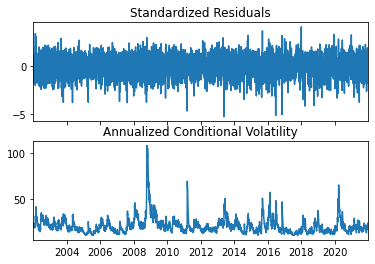

In [68]:
fig2NIKK = out2NIKK.plot(annualize="D") #generating volatility graphs

In [69]:
model3NIKK= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3NIKK= model3NIKK.fit()
print(out3NIKK.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 30389.44738011013
Iteration:      2,   Func. Count:     17,   Neg. LLF: 87634.34518206224
Iteration:      3,   Func. Count:     27,   Neg. LLF: 38889.44817502015
Iteration:      4,   Func. Count:     35,   Neg. LLF: 10027.191620942614
Iteration:      5,   Func. Count:     43,   Neg. LLF: 8052.17865902843
Iteration:      6,   Func. Count:     49,   Neg. LLF: 8481.01844405325
Iteration:      7,   Func. Count:     56,   Neg. LLF: 8722.213137205043
Iteration:      8,   Func. Count:     65,   Neg. LLF: 8110.0720839282885
Iteration:      9,   Func. Count:     72,   Neg. LLF: 8036.068475770066
Iteration:     10,   Func. Count:     78,   Neg. LLF: 8035.741721182497
Iteration:     11,   Func. Count:     84,   Neg. LLF: 8035.69884424468
Iteration:     12,   Func. Count:     90,   Neg. LLF: 8035.696200780599
Iteration:     13,   Func. Count:     96,   Neg. LLF: 8035.696071057871
Iteration:     14,   Func. Count:    102,   Neg. LLF: 8035.696116

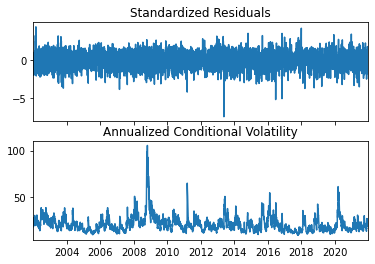

In [70]:
fig3NIKK = out3NIKK.plot(annualize="D") #generating volatility graphs